# Us Accidents Analysis

## About the dataset

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset

## Loading and Exploring csv data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Us_Accidents.csv')

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
df.shape

(1516064, 47)

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [7]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

## cleaning data

In [8]:
#dropping not required columns
df.drop(columns = ['Country','ID','Zipcode','Description','Airport_Code'], inplace=True)

In [9]:
#dropping columns due to more number of null values
df.drop(columns = ['Number'],inplace=True)

In [10]:
#filling null values of columns with mean
df['Wind_Chill(F)'].fillna(value=df['Wind_Chill(F)'].mean(),inplace=True)
df['Wind_Speed(mph)'].fillna(value=df['Wind_Speed(mph)'].mean(),inplace=True)
df['Visibility(mi)'].fillna(value=df['Visibility(mi)'].mean(),inplace=True)
df['Pressure(in)'].fillna(value=df['Pressure(in)'].mean(),inplace=True)
df['Temperature(F)'].fillna(value=df['Temperature(F)'].mean(),inplace=True)
df['Humidity(%)'].fillna(value=df['Humidity(%)'].mean(),inplace=True)
df['Precipitation(in)'].fillna(value=df['Precipitation(in)'].mean(),inplace=True)

In [11]:
#dropping rows of missing values
df.dropna(subset=['City','Weather_Timestamp','Timezone','Wind_Direction','Wind_Direction','Weather_Condition','Sunrise_Sunset'],inplace=True)

In [12]:
#resetting index
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)

In [13]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Outerbelt E,R,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,I-70 E,R,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,I-75 S,R,...,False,False,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,US-50 E,R,...,False,False,False,False,False,False,Night,Night,Night,Day
4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,I-77 N,R,...,False,False,False,False,False,False,Night,Night,Day,Day


In [14]:
df.shape

(1464423, 41)

In [15]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Street', 'Side', 'City',
       'County', 'State', 'Timezone', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [16]:
df.to_csv('Us_accidents_1.csv')

In [17]:
df['Start_Time']

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1464418    2019-08-23 18:03:25
1464419    2019-08-23 19:11:30
1464420    2019-08-23 19:00:21
1464421    2019-08-23 19:00:21
1464422    2019-08-23 18:52:06
Name: Start_Time, Length: 1464423, dtype: object

## Tasks

### 1)The state that has the highest number of accidents

Text(0, 0.5, 'Number of accidents')

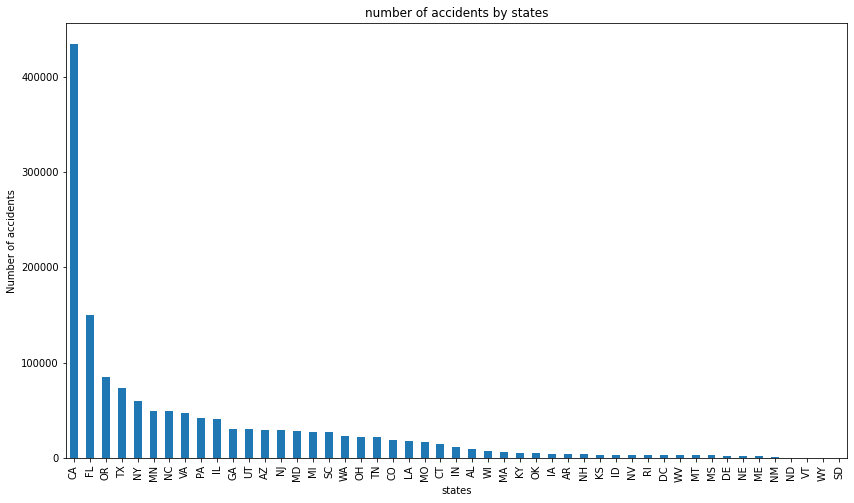

In [18]:
ax=df['State'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="number of accidents by states")
ax.set_xlabel("states")
ax.set_ylabel("Number of accidents")

### 2) At what time do accidents usually occur in the US

In [19]:
from datetime import datetime

In [20]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [21]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S')
df['hour'] = df['Start_Time'].dt.hour
df['month'] = df['Start_Time'].dt.month
df['day'] = df['Start_Time'].dt.day_name()

In [22]:
df['hour'].value_counts().head()

17    104747
16    102189
15     96744
18     88479
14     87403
Name: hour, dtype: int64

Text(0, 0.5, 'Number of accidents')

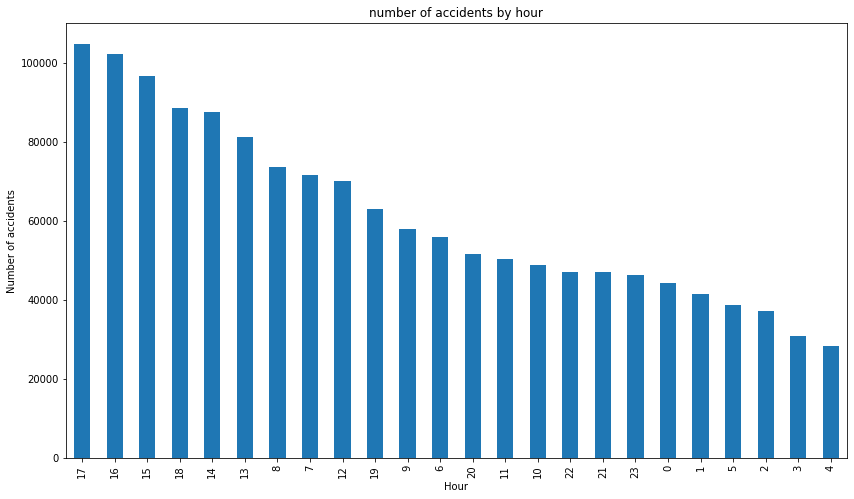

In [24]:
ax=df['hour'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="number of accidents by hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Number of accidents")

In [26]:
df['month'].value_counts().head()

12    268241
11    211392
10    175199
9     118957
6     109019
Name: month, dtype: int64

Text(0, 0.5, 'Number of accidents')

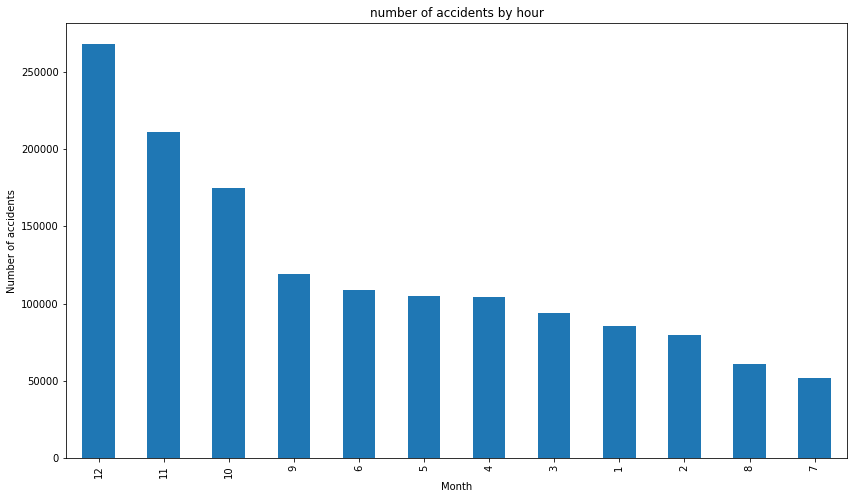

In [27]:
ax=df['month'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="number of accidents by hour")
ax.set_xlabel("Month")
ax.set_ylabel("Number of accidents")

In [28]:
df['day'].value_counts().head()

Thursday     250312
Wednesday    248180
Friday       246306
Tuesday      243475
Monday       228422
Name: day, dtype: int64

Text(0, 0.5, 'Number of accidents')

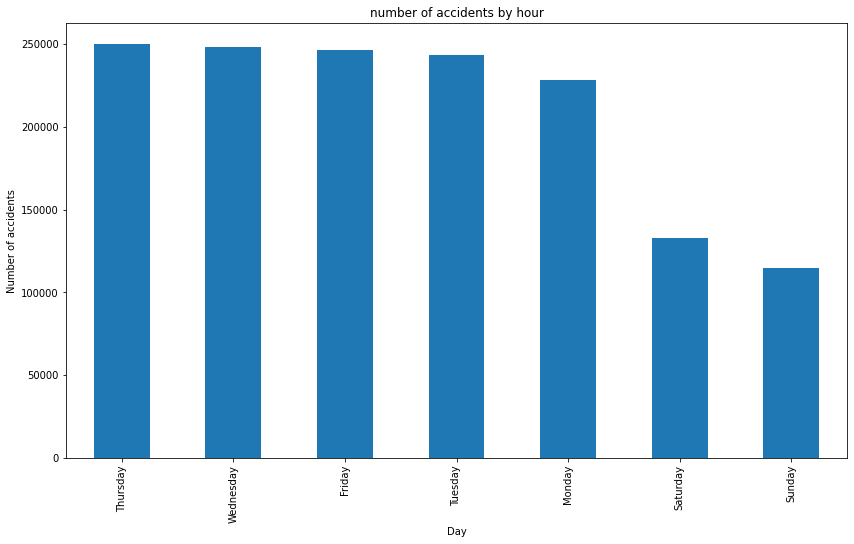

In [29]:
ax=df['day'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="number of accidents by hour")
ax.set_xlabel("Day")
ax.set_ylabel("Number of accidents")

### 3)Factors Affecting Accident Severity

Severity
Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay)

In [24]:
df = pd.read_csv('Us_accidents_1.csv')

In [30]:
import seaborn as sns

<AxesSubplot:xlabel='Severity', ylabel='Distance(mi)'>

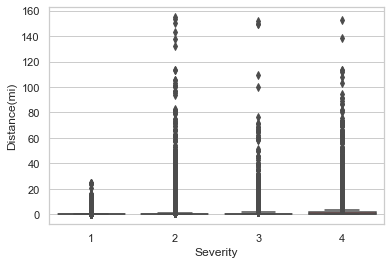

In [31]:
sns.set(style='whitegrid')
fmri = sns.load_dataset("fmri")
 
sns.boxplot(x='Severity',
                y='Distance(mi)',
                data=df)

<AxesSubplot:xlabel='Severity', ylabel='Humidity(%)'>

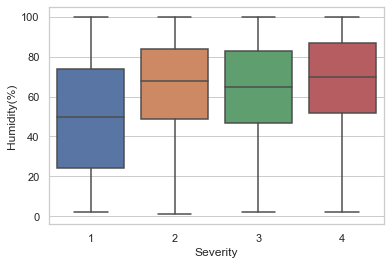

In [32]:
sns.set(style='whitegrid')
fmri = sns.load_dataset("fmri")
 
sns.boxplot(x='Severity',
                y='Humidity(%)',
                data=df)

<AxesSubplot:xlabel='Severity', ylabel='Wind_Speed(mph)'>

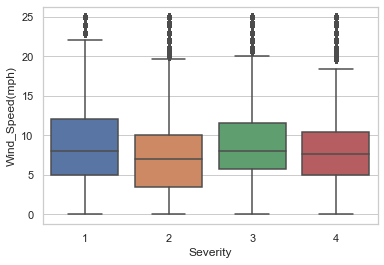

In [33]:
df2 = df[df['Wind_Speed(mph)']<=25]
sns.set(style='whitegrid')
fmri = sns.load_dataset("fmri")
 
sns.boxplot(x='Severity',
                y='Wind_Speed(mph)',
                data=df2)

<AxesSubplot:xlabel='Severity', ylabel='Temperature(F)'>

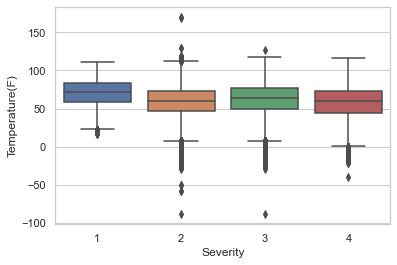

In [34]:
sns.set(style='whitegrid')
fmri = sns.load_dataset("fmri")
 
sns.boxplot(x='Severity',
                y='Temperature(F)',
                data=df)

### High Severity 

In [35]:
severity_4 = df[df['Severity']==4]

<AxesSubplot:title={'center':'most severe accidents by month'}>

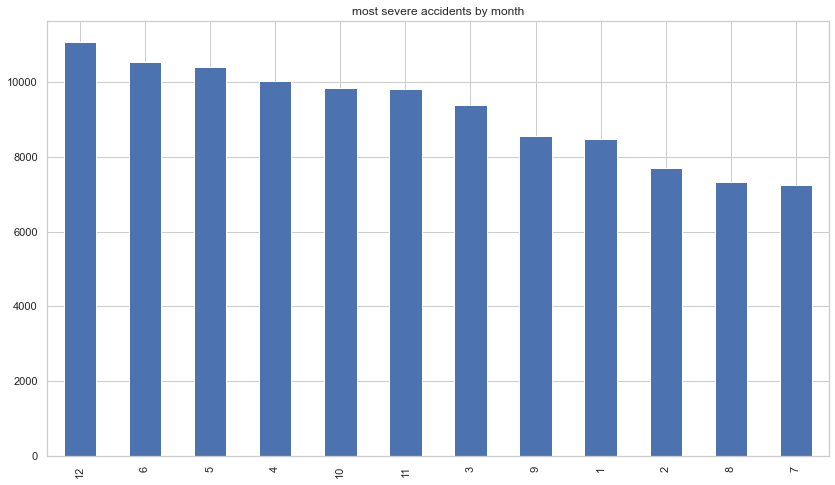

In [36]:
severity_4['month'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="most severe accidents by month")

<AxesSubplot:title={'center':'most severe accidents by day of the week'}>

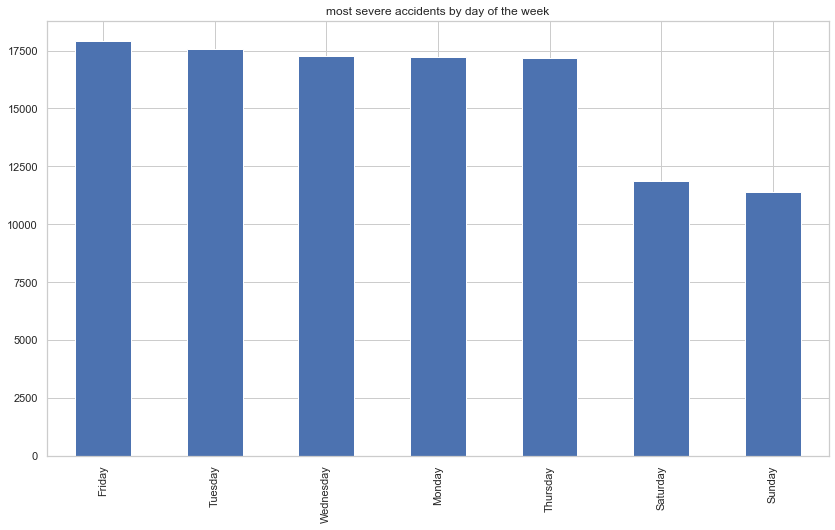

In [37]:
severity_4['day'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="most severe accidents by day of the week")

### 4)what side of the road most accidents occur?

Text(0, 0.5, 'Number of accidents')

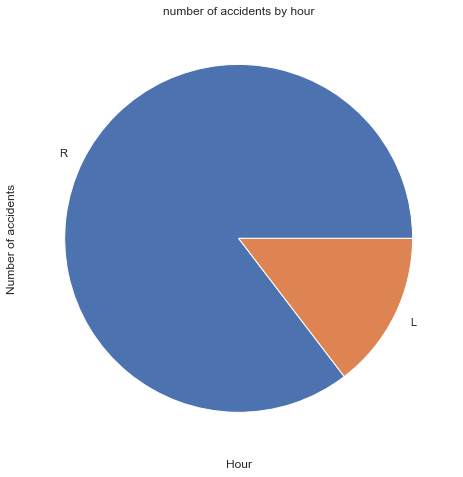

In [38]:
ax=df['Side'].value_counts().plot(kind='pie',
                                    figsize=(14,8),
                                    title="number of accidents by hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Number of accidents")

### 5) Scatter plot and heat map of accidents 

In [39]:
samp_df = df.sample(int(0.1*len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

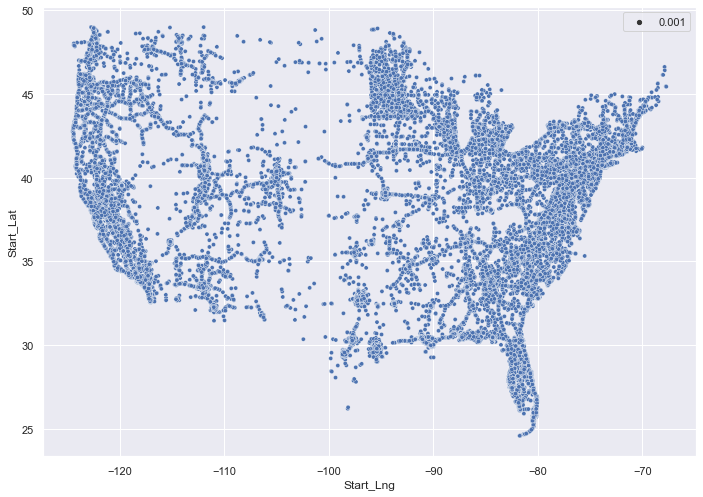

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=samp_df['Start_Lng'],y=samp_df['Start_Lat'],size=0.001)

In [42]:
!pip install folium
import folium

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.9.1 requires google-auth<3,>=1.6.3, which is not installed.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, which is not installed.
You should consider upgrading via the 'C:\Users\SACHIT\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 62.8/62.8 KB 210.4 kB/s eta 0:00:00
     -------------------------------------- 61.2/61.2 KB 808.3 kB/s eta 0:00:00
     ------------------------------------ 160.2/160.2 KB 417.8 kB/s eta 0:00:00
     ------------------------------------ 139.2/139.2 KB 294.4 kB/s eta 0:00:00


In [43]:
from folium.plugins import HeatMap

In [44]:
df_samp = df.sample(int(0.001*len(df)))

In [55]:
map = folium.Map(location=[48,-102],zoom_start=4)
HeatMap(zip(list(df_samp.Start_Lat),list(df_samp.Start_Lng))).add_to(map)
map

## Conclusions

### 1)California(CA) has highest number of accidents report(should note that newyork is not in dataset)
### 2)most of the accidents occured on 4:00pm-5:00pm
### 3)december and november month has highest number of accidents
### 4)majority of the accidents occured on right side of the road
### 5)heat map shows that east end and west end of the US(this could be lack of data from the middle states)